# COURSE: Master math by coding in Python
## SECTION: Probability theory

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# VIDEO: Histograms and probability densities

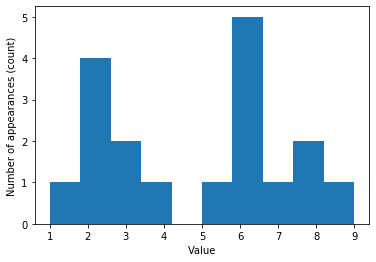

(array([1, 4, 2, 1, 1, 5, 1, 2, 1]), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))


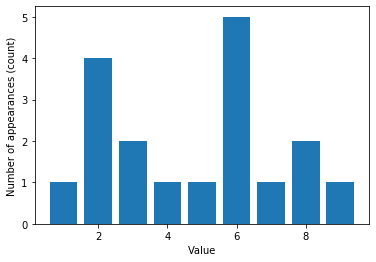

In [3]:
data = [1,2,2,2,2,3,4,5,6,6,6,6,7,8,9,8,6,3]

plt.hist(data)
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()

# with outputs
histdata = np.histogram(data,bins=np.arange(1,11))
print(histdata)
plt.bar(histdata[1][:-1],histdata[0])
plt.xlabel('Value')
plt.ylabel('Number of appearances (count)')
plt.show()


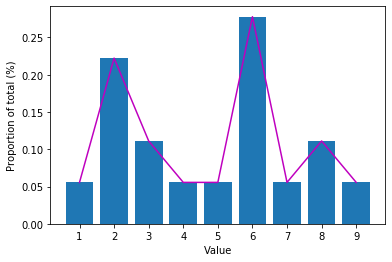

In [5]:
# convert to probability
x = histdata[1][:-1]
y = histdata[0]
yP = y/np.sum(y)

plt.bar(x,yP)
plt.plot(x,yP,'m')
plt.xlabel('Value')
plt.xticks(np.arange(1,10))
plt.ylabel('Proportion of total (%)')
plt.show()

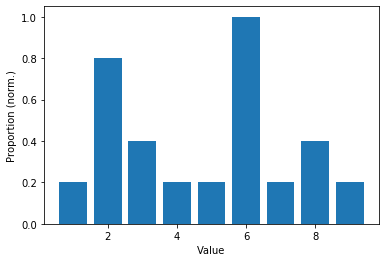

In [6]:
# another option: normalize to max=1 (not a probability distribution, but often useful)
yN = y/np.max(y)

plt.bar(x,yN)
plt.xlabel('Value')
plt.ylabel('Proportion (norm.)')
plt.show()

### Exercise

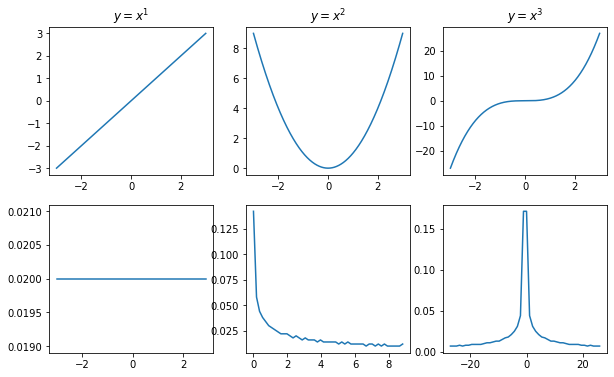

In [7]:
# pdensities of x, x^2, and x^3
x = np.linspace(-3,3,1000)

fig,ax = plt.subplots(2,3)
fig.set_size_inches(10,6) # width, height in inches

for i in range(3):
    
    # histogram of the function
    y = x**(i+1)
    hd = np.histogram(y,50)
    yp = hd[0] / sum(hd[0])
    
    # plot the function
    ax[0,i].plot(x,y)
    ax[0,i].set_title('$y=x^{%g}$' %(i+1))
    
    # plot its distribution
    ax[1,i].plot(hd[1][:-1],yp)
    
    
plt.show()

# VIDEO: Virtual coin tosses

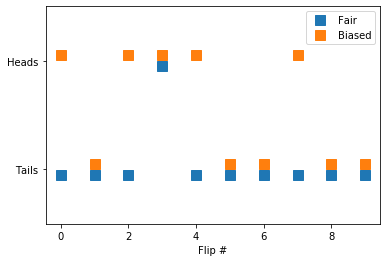

In [8]:
# p(heads), which one is weighted?

faircoin = .5
biascoin = .6

nTrials = 10

# initialize
results = np.zeros((2,nTrials))

for i in range(nTrials):
    results[0,i] = np.random.rand()>faircoin
    results[1,i] = np.random.rand()>biascoin
    

plt.plot(results[0,:]-.05,'s',markersize=10)
plt.plot(results[1,:]+.05,'s',markersize=10)
plt.yticks([0,1],['Tails','Heads'])
plt.xlabel('Flip #')
plt.ylim([-.5,1.5])
plt.legend(['Fair','Biased'])
plt.show()

In [4]:
import pandas as pd
df = pd.DataFrame(results,dtype='int',index=['fair','biased'])
df

,0,1,2,3,4,5,6,7,8,9
fair,1,0,1,1,1,0,0,0,1,1
biased,1,1,0,1,0,1,1,0,0,0


In [5]:
df['Ave.'] = df.mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,Ave.
fair,1,0,1,1,1,0,0,0,1,1,0.6
biased,1,1,0,1,0,1,1,0,0,0,0.5


### Exercise

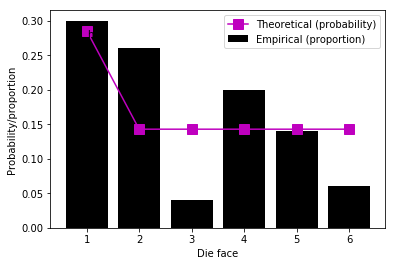

In [11]:
# weighted die. 2-6 have equal probability, 1 has twice probability as any other flip. make histogram after 50 rolls

n = 50

outcomes = np.zeros(6)

pureprobs = np.array([2,1,1,1,1,1])
pureprobs = pureprobs/np.sum(pureprobs)

for i in range(n):
    
    # roll 7-sided die
    dieroll = np.random.randint(0,7)
    
    # impose bias
    if dieroll==6:
        dieroll=0
    
    # increment the outcome
    outcomes[dieroll] += 1

plt.bar(range(1,7),outcomes/n,color='k',label='Empirical (proportion)')
plt.plot(range(1,7),pureprobs,'ms-',markersize=10,label='Theoretical (probability)')
plt.xlabel('Die face')
plt.ylabel('Probability/proportion')

for i in range(1,7):
    plt.text(i,outcomes[i-1]/n-.025,'hi')#'%s%%' %int(100*np.round(outcomes[i-1]/n,2)),\
             #fontsize=12,horizontalalignment='center',color='w')

plt.legend()
plt.show()


# VIDEO: Building distributions from random numbers

Mean of 5.00253, std of 2.00143


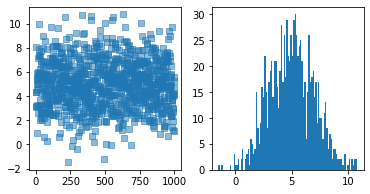

In [9]:
# review of normal distribution

shift = 5
stretch = 2
n = 1000

pnts = np.random.randn(n)*stretch + shift
print('Mean of %g, std of %g' %(np.mean(pnts),np.std(pnts)))

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,100)

plt.show()

Mean of 5.00441, range of 1.99814


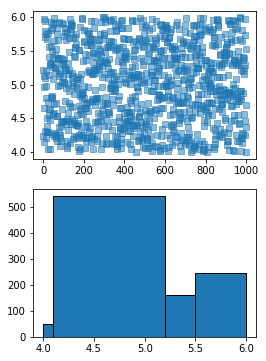

In [19]:
# review of uniform distribution

shift = 5
stretch = 2
n = 1000

pnts = np.random.rand(n)*stretch + shift-.5*stretch
print('Mean of %g, range of %g' %(np.mean(pnts),np.max(pnts)-np.min(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,bins=[4,4.1,5.2,5.5,6],edgecolor='k')

plt.show()

Mean of 3.34, variance of 3.3624


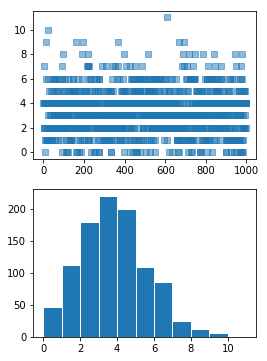

In [23]:
# Poisson distribution
lam = 3.4

pnts = np.random.poisson(lam,n)
print('Mean of %g, variance of %g' %(np.mean(pnts),np.var(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,bins=np.arange(0,np.max(pnts)+1),edgecolor='w')

plt.show()

Mean of 3.3779, variance of 16.345


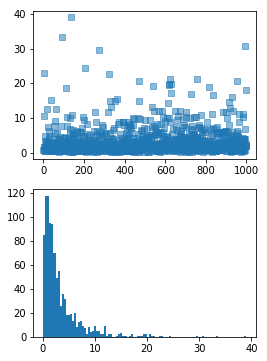

In [24]:
stretch = 1
shift = np.log(2)

pnts = np.random.lognormal(shift,stretch,n)
print('Mean of %g, variance of %g' %(np.mean(pnts),np.var(pnts)))

fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(pnts,'s',alpha=.5)
ax[1].hist(pnts,100)

plt.show()

### Exercise

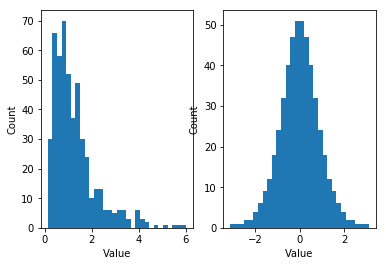

In [29]:
# transform any distribution into Gaussian
from scipy.stats import rankdata

n = 500

orig_data  = 2**np.random.randn(n)

# rank transform
trans_data = rankdata( orig_data )

# add a data point to the top
trans_data = np.append(trans_data,np.max(trans_data)+1)

trans_data = 2*(trans_data/np.max(trans_data))-1
trans_data = np.delete(trans_data,n)

trans_data = np.arctanh( trans_data )


fig,ax = plt.subplots(1,2)

ax[0].hist(orig_data,30)
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Count')

ax[1].hist(trans_data,30)
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Count')

plt.show()

# VIDEO: The central limit theorem

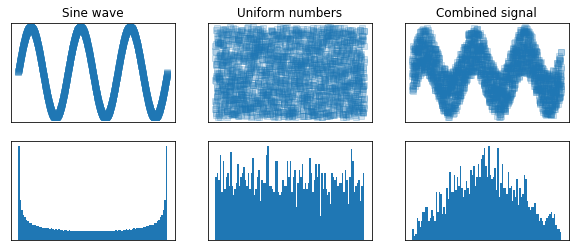

In [31]:
# generate data from various distributions, then sum

n = 2000

sig1 = np.sin(np.linspace(0,6*np.pi,n))
sig2 = np.random.rand(n)*2-1

signal = sig1 + sig2


# plot the two individual features and their distributions
fig,ax = plt.subplots(2,3,figsize=(10,4))

ax[0,0].plot(sig1,'s',alpha=.2)
ax[0,0].set_title('Sine wave')
ax[1,0].hist(sig1,100)

ax[0,1].plot(sig2,'s',alpha=.2)
ax[0,1].set_title('Uniform numbers')
ax[1,1].hist(sig2,100)

ax[0,2].plot(signal,'s',alpha=.2)
ax[0,2].set_title('Combined signal')
ax[1,2].hist(signal,100)

for i in np.matrix.flatten(ax):
    i.set_yticks([])
    i.set_xticks([])

plt.show()

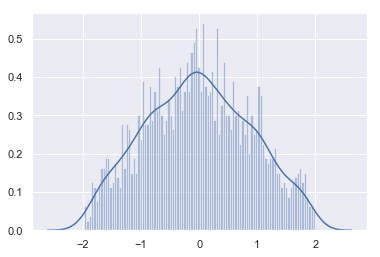

In [34]:
# show using seaborn

import seaborn as sns
sns.set()

sns.distplot(signal,100)
plt.show()

### Exercise

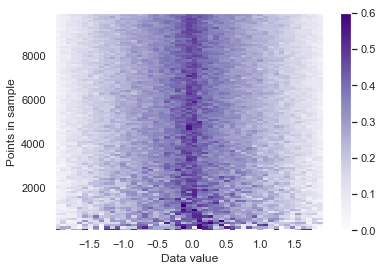

In [41]:
# fit to Gaussian should improve with larger N. increase N in a loop and extract pdensity

ns = np.arange(50,10000,100)
nbins = 50

allhist = np.zeros((len(ns),nbins))

for i in range(len(ns)):
    sig1 = np.sin(np.linspace(0,6*np.pi,ns[i]))
    sig2 = np.random.rand(ns[i])*2-1
    
    [allhist[i,:],binedges] = np.histogram(sig1+sig2,nbins,density=True)

plt.pcolor(binedges[0:-1],ns,allhist,vmax=.6,cmap='Purples') # viridis
plt.xlabel('Data value')
plt.ylabel('Points in sample')
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

# VIDEO: Joint probability distributions 

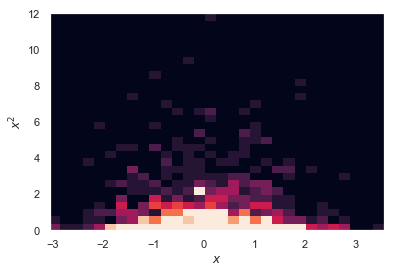

In [42]:
n = 1000

x = np.random.randn(n)
y = np.random.randn(n)**2

plt.hist2d(x,y,30,vmax=10)
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

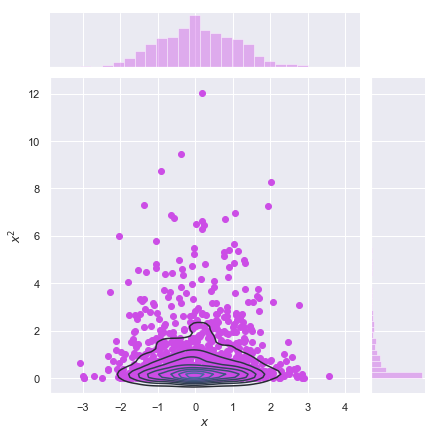

In [52]:
sns.jointplot(x,y,kind='scatter',color=[.8,.3,.9]).plot_joint(sns.kdeplot)
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

### Exercise

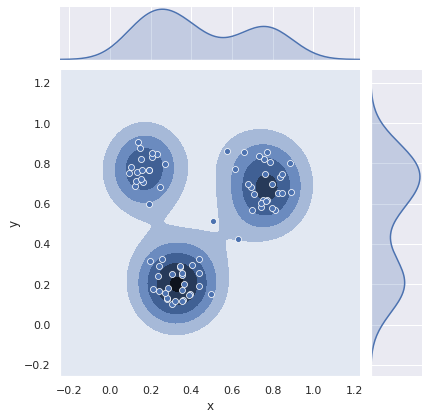

In [53]:
# import data with pandas, name variables x and y, determine (visually) how many clusters are in the data

import pandas as pd
data = pd.read_csv('data.csv',header=None,names=['x','y'])
data

sns.jointplot(data['x'],data['y'],kind='kde',levels=5).plot_joint(sns.scatterplot)
plt.show()

# VIDEO: Probability BUG HUNT!

1.000000000000002


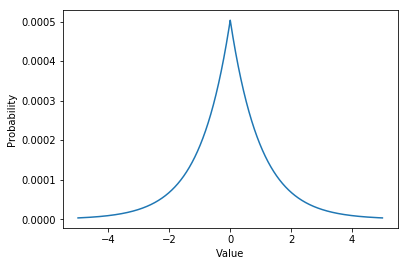

In [147]:
# Show the Laplace probability distribution
x = np.linspace(-5,5,10000)
data = np.exp(-np.abs(x))

dataP = data/np.sum(data)
print(sum(dataP))

plt.plot(x,dataP)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

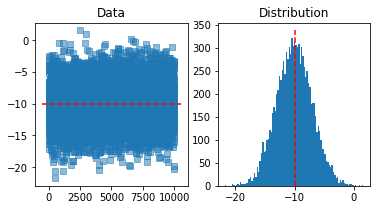

In [148]:
# shifted/stretched normal distribution

shift = -10
stretch = 3
n = 10000

pnts = np.random.randn(n)*stretch + shift

fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].plot(pnts,'s',alpha=.5)
xlim = ax[0].get_xlim()
ax[0].plot(xlim,[shift,shift],'r--')
ax[0].set_title('Data')

ax[1].hist(pnts,100)
ylim = ax[1].get_ylim()
ax[1].plot([shift,shift],ylim,'r--')
ax[1].set_title('Distribution')

plt.show()

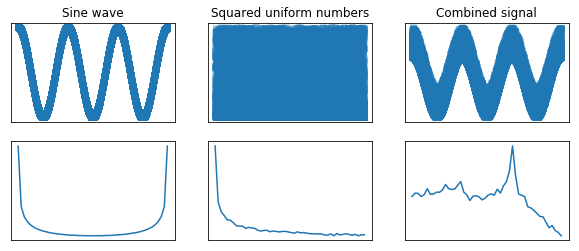

In [149]:
# generate data from various distributions, then sum

n = 20000

sig1 = np.cos(np.linspace(0,6*np.pi,n))
sig2 = np.random.rand(n)**2
sig2 = sig2 - np.mean(sig2)

signal = sig1 + sig2

# get probability distributions
hd1 = np.histogram(sig1,50)
hd2 = np.histogram(sig2,50)

# histogram of summed signals, not summed histograms
hd3 = np.histogram(sig1+sig2,50)


# plot the two individual features and their distributions
fig,ax = plt.subplots(2,3,figsize=(10,4))

ax[0,0].plot(sig1,'s',alpha=.2)
ax[0,0].set_title('Sine wave')
ax[1,0].plot(hd1[1][:-1],hd1[0])

ax[0,1].plot(sig2,'s',alpha=.2)
ax[0,1].set_title('Squared uniform numbers')
ax[1,1].plot(hd2[1][:-1],hd2[0])

ax[0,2].plot(signal,'s',alpha=.2)
ax[0,2].set_title('Combined signal')
ax[1,2].plot(hd1[1][:-1],hd3[0])

for i in np.matrix.flatten(ax):
    i.set_yticks([])
    i.set_xticks([])

plt.show()

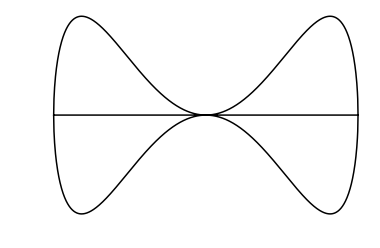

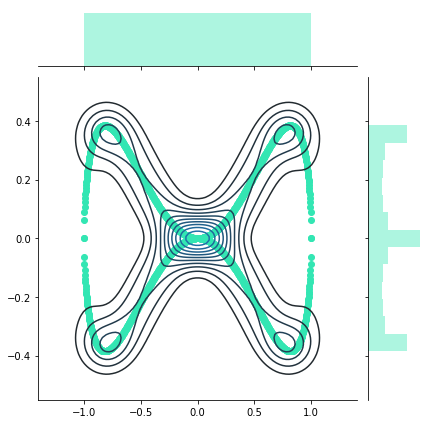

In [150]:
# "Dumbbell curve"
n = 1000
x = np.linspace(-1,1,n)

y = np.append( x**2 * np.sqrt(1-x**2), -x**2 * np.sqrt(1-x**2) )

plt.plot(np.append(x,x),y,'k')
plt.axis('off')
plt.show()

import seaborn as sns

sns.jointplot(np.append(x,x),y,kind='scatter',color=[.2,.9,.7]).plot_joint(sns.kdeplot)
plt.show()